In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ztest

In [2]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

m_iq = 110
sd_iq = 15/math.sqrt(50)
alpha = 0.05
mu0 = 100
data = sd_iq*randn(50)+m_iq
print("mean = %.2f standard deviation = %.2f" % (np.mean(data), np.std(data)))

ztest_score, pvalue = ztest(data,value = mu0, alternative= "larger")
if(pvalue < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

mean = 109.63 standard deviation = 2.20
Reject Null Hypothesis


# One Sample $t$ - test
* to test the average height of a population is 1.75m
* assume that the height is normaly distributed: X ~ $N(\mu,\sigma^2)$

In [2]:
# xbar and sxbar are the estimators of mu and sigma 
x=[1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]
xb = np.mean(x)
mu0=1.75
std=np.std(x,ddof=1)
n=len(x)
t=(xb-mu0)/(std/np.sqrt(n))
print(t)

2.3968766311585883


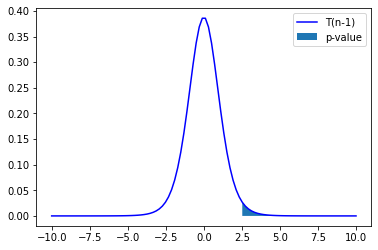

In [3]:
tvals=np.linspace(-10,10,100)
tstat=stats.t.pdf(tvals,n-1)
plt.plot(tvals,tstat,'b-',label='T(n-1)')
upper=tvals[tvals>t]
tstat1=stats.t.pdf(upper,n-1)
plt.fill_between(upper,0,tstat1,alpha=1,label='p-value')
plt.legend()
plt.show()

# Pearson correlation test: test association between quantitative variables

In [4]:
n=50 # number of samples
x=np.random.normal(size=n)
y=2*x+np.random.normal(size=n)
cor,pval=stats.pearsonr(x,y)
print(f"the p value is {pval}")

the p value is 4.049271758855088e-19


# two sample (student) $t$ - test: compare two means

In [5]:
height = np.array([ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87,
                   1.66, 1.71, 1.73, 1.64, 1.70, 1.60, 1.79, 1.73, 1.62, 1.77])
grp = np.array(["M"] * 10 + ["F"] * 10)
print(stats.ttest_ind(height[grp=='M'],height[grp=='F'],equal_var=True))
#stats.tttest_ind refers to t test for indepndent groups or samples of data provided and provides the t values along with the pvalue for the given test

Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)


# Chi square $\chi^2$ (categorial~categorial)

In [14]:
#no of samples = 15
#first 10 samples have carnal tumor and the last 5 dont have
# first 8 have metasttasis ,the  6 without and the last without 
carnal_tumor=np.array([1]*10+[0]*5)
meta=np.array([1]*8+[0]*6+[1])
ct=pd.crosstab(carnal_tumor,meta,rownames=['carnal_tumor'],colnames=['meta'])
print("Observed table")
print("---------------")
print(ct)
chi2,pval,dof,expected=stats.chi2_contingency(ct)
print("Statistics")
print("------------------")
print(f"chi2={chi2},pval={pval}")
print("Expected table")
print("-----------------------")
print(expected)

Observed table
---------------
meta          0  1
carnal_tumor      
0             4  1
1             2  8
Statistics
------------------
chi2=2.8125,pval=0.09353251268909288
Expected table
-----------------------
[[2. 3.]
 [4. 6.]]


* computing the expected cross-table

In [20]:
meta_marg=ct.sum(axis=0)
meta_freq=meta_marg/meta_marg.sum()
carnal_t_marg=ct.sum(axis=1)
carnal_t_freq=carnal_t_marg/carnal_t_marg.sum()
print(f"carnal tumor frequency? Yes: {(carnal_t_freq[0])}, No: {carnal_t_freq[1]}")
print(f"Metasis frequency? yes: {meta_freq[0]},No: {meta_freq[1]}")


carnal tumor frequency? Yes: 0.3333333333333333, No: 0.6666666666666666
Metasis frequency? yes: 0.4,No: 0.6


In [21]:
print("expected frequencies:")
print(np.outer(carnal_t_freq,meta_freq))

expected frequencies:
[[0.13333333 0.2       ]
 [0.26666667 0.4       ]]


In [22]:
print("expected cross-table (frequencies+N:")
print(np.outer(carnal_t_freq,meta_freq)*len(carnal_tumor))

expected cross-table (frequencies+N:
[[2. 3.]
 [4. 6.]]
